<a href="https://colab.research.google.com/github/Chukwugude/Machine-Learning-projects/blob/main/Tensorflow_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [4]:
# Loading data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4422102/4422102 [==============================] - 1s 0us/step
x_train.shape: (60000, 28, 28)


In [5]:
# the data is 2D!
# But convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [6]:
# Checking the number of classes
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [7]:
# Building the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [9]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1206 - accuracy: 0.9537 - val_loss: 0.3889 - val_accuracy: 0.9005
Epoch 2/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1158 - accuracy: 0.9565 - val_loss: 0.3796 - val_accuracy: 0.8983
Epoch 3/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1081 - accuracy: 0.9586 - val_loss: 0.4118 - val_accuracy: 0.8999
Epoch 4/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1068 - accuracy: 0.9599 - val_loss: 0.4169 - val_accuracy: 0.8998
Epoch 5/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0974 - accuracy: 0.9631 - val_loss: 0.4141 - val_accuracy: 0.9008
Epoch 6/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0947 - accuracy: 0.9632 - val_loss: 0.4358 - val_accuracy: 0.8998
Epoch 7/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0925 - accuracy: 0.9647 - val_loss: 0.4453 -

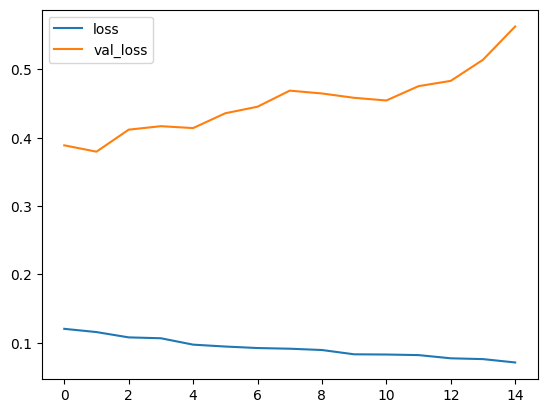

In [10]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

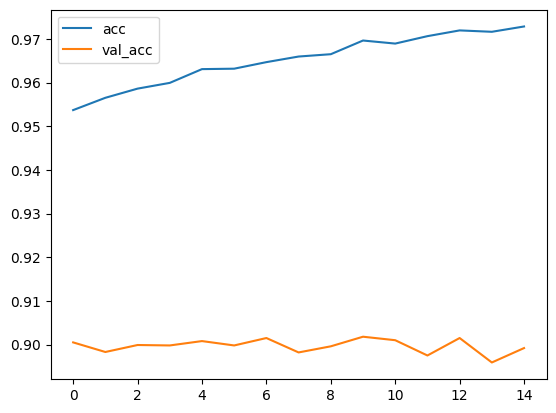

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 2s 7ms/step
Confusion matrix, without normalization
[[881   3  20  19   1   0  68   0   8   0]
 [  3 977   2  12   3   0   2   0   1   0]
 [ 20   3 866   9  37   0  63   0   2   0]
 [ 15  11  24 883  36   1  24   0   5   1]
 [  0   1  75  16 844   0  61   0   3   0]
 [  1   0   0   1   0 971   0  20   0   7]
 [122   1  77  20  94   0 673   1  12   0]
 [  0   0   0   0   0  13   0 958   0  29]
 [  7   0   3   2   2   1   2   2 981   0]
 [  1   0   0   0   0   6   0  34   1 958]]


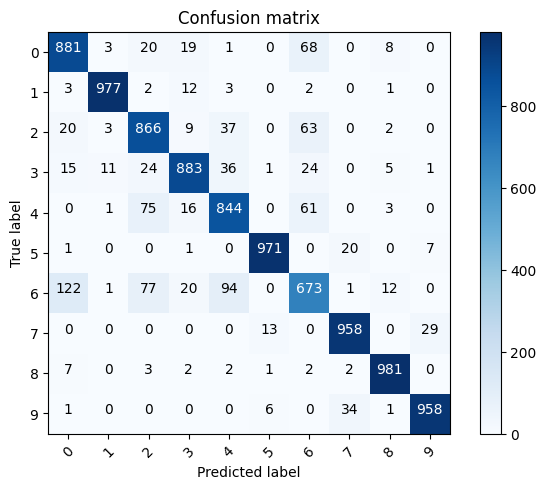

In [12]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [13]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

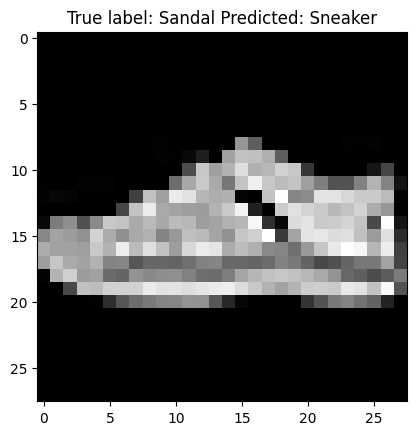

In [14]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));